In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from painter import Painter

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
painter = Painter()
painter.patch_radius = 512
painter.set_brush('colorfull trance')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
painter.scheduler.timesteps

tensor([958, 925, 892, 859, 826, 793, 760, 727, 694, 661, 628, 595, 562, 529,
        496, 463, 430, 397, 364, 331, 298, 265, 232, 199, 166, 133, 100,  67,
         34,   1])

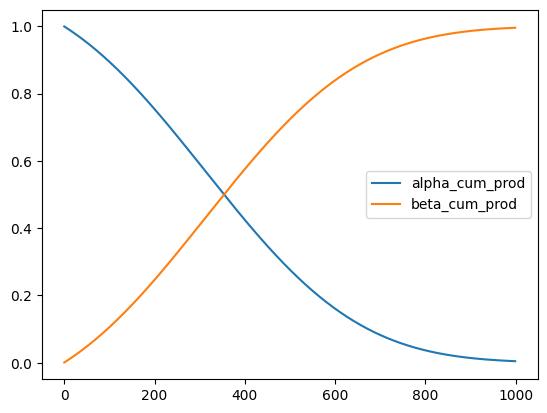

In [4]:
fig, ax = plt.subplots()
ax.plot(painter.scheduler.alphas_cumprod, label='alpha_cum_prod')
ax.plot(1 - painter.scheduler.alphas_cumprod, label='beta_cum_prod')
ax.legend()
plt.show()

In [33]:
painter.set_brush('colorfull trance')

In [31]:
painter.set_brush(noise=True)

In [26]:
def print_sample_statistics(name, x):
    sample = x[..., 40:56, 40:56]
    print(f'{name}: ({sample.mean():.2f}, {sample.std():.2f})')

latents: (0.05, 1.08)
pred_latents: (0.11, 0.68)
expected_latents: (0.11, 0.68)


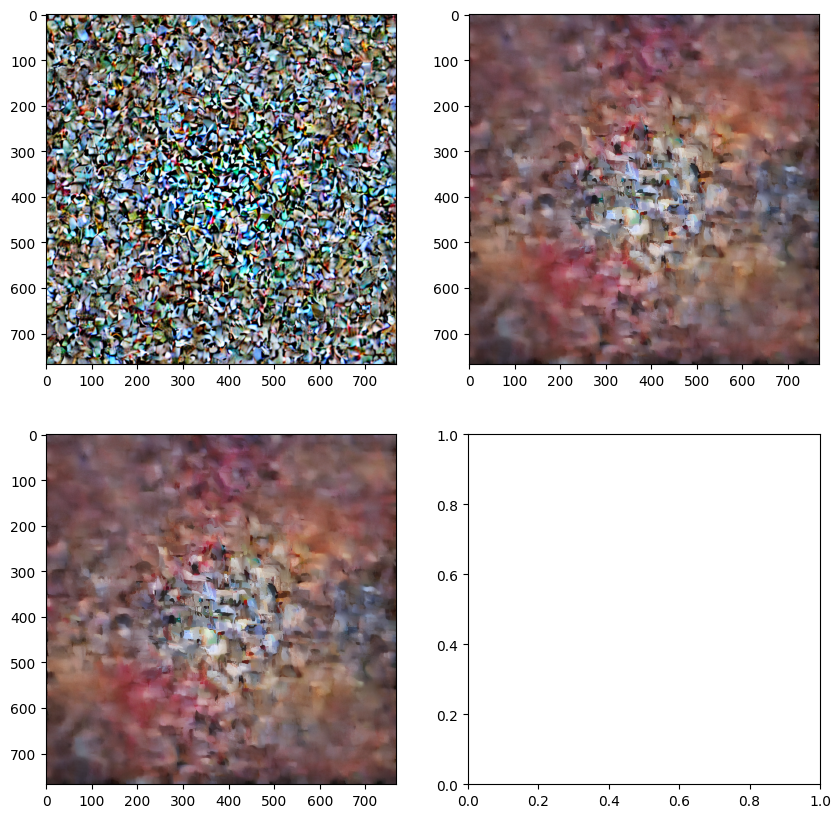

In [34]:
strokes = [{'x': 384, 'y': 384}]
_ = painter.paint(strokes)
latents = painter.latents
pred_latents = painter.pred_latents

if painter.noise_brush:
    expected_latents = painter.latents * .7
else:
    expected_latents = pred_latents

latents_img = painter.latents_to_image(latents)
pred_latents_img = painter.latents_to_image(pred_latents)
expected_latents_img = painter.latents_to_image(expected_latents)

print_sample_statistics('latents', latents)
print_sample_statistics('pred_latents', pred_latents)
print_sample_statistics('expected_latents', expected_latents)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0][0].imshow(latents_img)
axes[0][1].imshow(pred_latents_img)
axes[1][0].imshow(expected_latents_img)
plt.show()